In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib import cm


%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [20]:
DATA_FILE = 'other-American_B01362.csv'
Ame_data= pd.read_csv(DATA_FILE)
Ame_data.head()

,DATE,TIME,PICK UP ADDRESS
0,7/1/2014,12:00:00 AM,"874 E 139th St Mott Haven, BX"
1,7/1/2014,12:01:00 AM,"628 E 141st St Mott Haven, BX"
2,7/1/2014,12:01:00 AM,"601 E 156th St South Bronx, BX"
3,7/1/2014,12:01:00 AM,"708 E 138th St Mott Haven, BX"
4,7/1/2014,12:02:00 AM,"700 E 140th St Mott Haven, BX"


In [21]:
Ame_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91712 entries, 0 to 91711
Data columns (total 3 columns):
DATE               91712 non-null object
TIME               91712 non-null object
PICK UP ADDRESS    91712 non-null object
dtypes: object(3)
memory usage: 2.1+ MB


In [22]:
Ame_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91712 entries, 0 to 91711
Data columns (total 3 columns):
DATE               91712 non-null object
TIME               91712 non-null object
PICK UP ADDRESS    91712 non-null object
dtypes: object(3)
memory usage: 2.1+ MB


In [24]:
Ame_data['DATE'] = pd.to_datetime(Ame_data['DATE'], format="%m/%d/%Y")
Ame_data['TIME'] = pd.to_datetime(Ame_data['TIME'], format="%I:%M:%S  %p")
#Ame_data['TIME'] = pd.to_dataetime(Ame_data['TIME'],format='%h:%m:%s')
Ame_data['DayOfWeekNum'] = Ame_data['DATE'].dt.dayofweek
Ame_data['DayOfWeek'] = Ame_data['DATE'].dt.weekday_name
Ame_data['MonthDayNum'] = Ame_data['DATE'].dt.day
Ame_data['HourOfDay'] = Ame_data['TIME'].dt.hour

Text(0.5, 1.0, 'Journeys by Week Day')

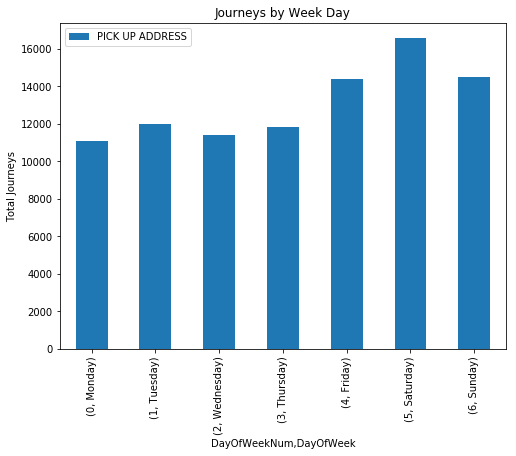

In [25]:
Ame_weekdays = Ame_data.pivot_table(index=['DayOfWeekNum','DayOfWeek'],values='PICK UP ADDRESS',aggfunc='count')

Ame_weekdays.plot(kind='bar', figsize=(8,6))
plt.ylabel('Total Journeys')
plt.title('Journeys by Week Day')


Text(0.5, 1.0, 'Journeys by Hour')

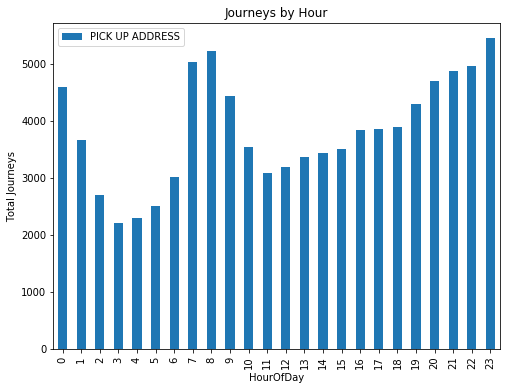

In [27]:
Ame_hour = Ame_data.pivot_table(index=['HourOfDay'],
                                  values='PICK UP ADDRESS',
                                  aggfunc='count')
Ame_hour.plot(kind='bar', figsize=(8,6))
plt.ylabel('Total Journeys')
plt.title('Journeys by Hour')